## Importing essential libraries for Data Preprocessing and Exploration

In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [55]:
ds = pd.read_csv(r'C:\Users\ozair\Documents\Datasets\titanic\train.csv')
test_data = pd.read_csv(r'C:\Users\ozair\Documents\Datasets\titanic\test.csv')

## Exploratory Data Analysis

In [56]:
ds.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [57]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
ds.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

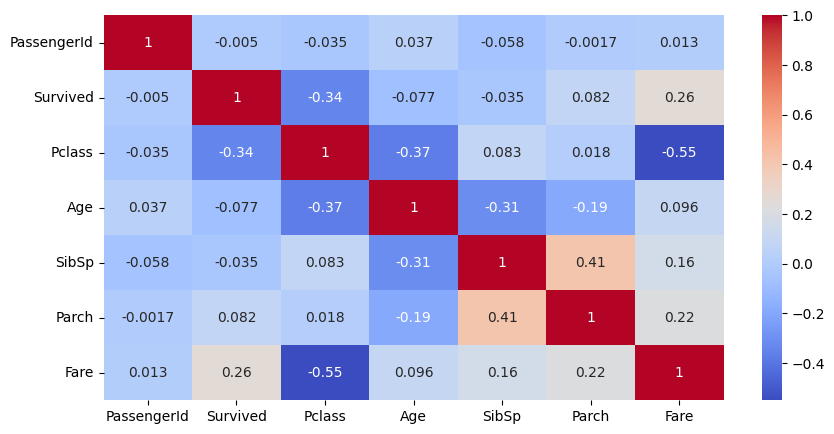

In [60]:
plt.figure(figsize = (10,5))
sns.heatmap(data = ds.corr(), annot = True, cmap = 'coolwarm')

<Axes: xlabel='Survived', ylabel='count'>

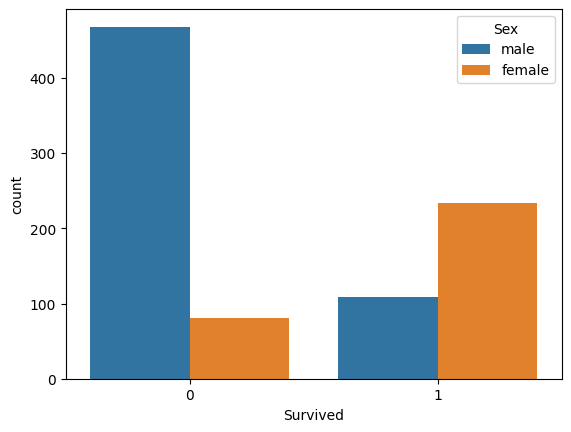

In [61]:
sns.countplot(data = ds,x='Survived', hue = 'Sex')

In [62]:
women_survived = ds.loc[ds['Sex']=='female']['Survived']
rate_women = sum(women_survived) / len(women_survived)

In [63]:
rate_women

0.7420382165605095

In [64]:
men_survived = ds.loc[ds['Sex']=='male']['Survived']
rate_men = sum(men_survived) / len(men_survived)

In [65]:
rate_men

0.18890814558058924

<Axes: xlabel='Fare', ylabel='Parch'>

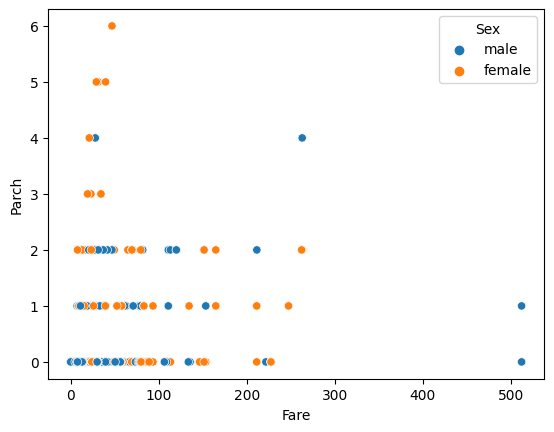

In [66]:
sns.scatterplot(data = ds,
               x ='Fare',
               y ='Parch',
               hue= 'Sex')

In [67]:
def value_count(data,column):
    return data[column].value_counts()

In [68]:
value_count(ds,'Pclass')

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [69]:
value_count(ds,'SibSp')

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [70]:
value_count(ds,'Parch')

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [71]:
value_count(ds,'Embarked')

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [72]:
ds = ds.drop('Ticket',axis =1)
ds = ds.drop('Name',axis =1)
ds = ds.drop('Cabin',axis =1)

In [73]:
ds = pd.get_dummies(ds,columns=['Sex'],drop_first = True)

In [74]:
ds['Embarked'] = ds['Embarked'].map({'S':0, 'Q':1, 'C':2})

In [75]:
ds.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,1,0,3,22.0,1,0,7.2500,0.0,1
1,2,1,1,38.0,1,0,71.2833,2.0,0
2,3,1,3,26.0,0,0,7.9250,0.0,0
3,4,1,1,35.0,1,0,53.1000,0.0,0
4,5,0,3,35.0,0,0,8.0500,0.0,1
5,6,0,3,NaN,0,0,8.4583,1.0,1
6,7,0,1,54.0,0,0,51.8625,0.0,1
7,8,0,3,2.0,3,1,21.0750,0.0,1
8,9,1,3,27.0,0,2,11.1333,0.0,0
9,10,1,2,14.0,1,0,30.0708,2.0,0


In [94]:
# test_data = test_data.drop('Ticket',axis =1)
# test_data = test_data.drop('Name',axis =1)
# test_data = test_data.drop('Cabin',axis =1)
# test_data = pd.get_dummies(test_data,columns=['Sex'],drop_first = True)
# test_data['Embarked'] = test_data['Embarked'].map({'S':0, 'Q':1, 'C':2})

In [79]:
ds['Age'] = ds['Age'].fillna(ds['Age'].mean())
ds['Embarked'] = ds['Embarked'].fillna(ds['Embarked'].median())

## Importing 

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [78]:
from sklearn.model_selection import train_test_split

In [80]:
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Sex_male       0
dtype: int64

In [81]:
X = ds.drop(['PassengerId','Survived'],axis = 1)
y = ds['Survived']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 101)

In [83]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
331,1,45.500000,0,0,28.5000,0.0,1
700,1,18.000000,1,0,227.5250,2.0,0
748,1,19.000000,1,0,53.1000,0.0,1
751,3,6.000000,0,1,12.4750,0.0,1
481,2,29.699118,0,0,0.0000,0.0,1
...,...,...,...,...,...,...,...
154,3,29.699118,0,0,7.3125,0.0,1
454,3,29.699118,0,0,8.0500,0.0,1
879,1,56.000000,0,1,83.1583,2.0,0
771,3,48.000000,0,0,7.8542,0.0,1


In [86]:
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.82      0.70      0.76        80

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [87]:
print(confusion_matrix(y_test,predictions))

[[87 12]
 [24 56]]


In [88]:
input_data = (3,0,35,0,0,8.05,0)
input_data_as_np_array = np.asarray(input_data)

In [89]:
input_data_as_np_array.reshape(1,-1)

array([[ 3.  ,  0.  , 35.  ,  0.  ,  0.  ,  8.05,  0.  ]])

In [90]:
rand_passenger = np.asarray(X_test.iloc[2]).reshape(1,-1)

In [91]:
rf.predict(rand_passenger)

array([0], dtype=int64)

In [92]:
rf.predict(input_data_as_np_array.reshape(1,-1))

array([1], dtype=int64)